In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
import statistics
import scipy.stats as stats

In [3]:
ownerdf = pd.read_csv('data/ownerdf.csv')
spyscrapedf = pd.read_csv('data/spyscrapedf.csv')

In [4]:
ownerdf.head(1)

,title,owners_median,positive,negative,num_reviews,ccu,median_2weeks,median_forever,average_2weeks,average_forever,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1500000.0,26922,14940,36837,23037,279,1600,585,2074,...,0,0,0,0,1,0,0,0,0,0


In [5]:
ownerdf.columns

Index(['title', 'owners_median', 'positive', 'negative', 'num_reviews', 'ccu',
       'median_2weeks', 'median_forever', 'average_2weeks', 'average_forever',
       'been_sale', 'orig_price', 'num_tags', 'num_genres', 'year_released',
       'languages_filled', 'rating_val', 'Singleplayer_tag', 'Indie_tag',
       'Action_tag', 'Adventure_tag', 'Casual_tag', 'Strategy_tag',
       'Multiplayer_tag', 'RPG_tag', 'Simulation_tag', 'Atmospheric_tag',
       'Horror_tag', '2D_tag', 'Soundtrack_tag', 'Great_tag', 'Story_tag',
       'Rich_tag', 'World_tag', 'Shooter_tag', 'Puzzle_tag', 'TurnBased_tag',
       'Open_tag', 'FirstPerson_tag', 'Survival_tag', 'Fantasy_tag',
       'Funny_tag', 'Coop_tag', 'Platformer_tag', 'Early_tag', 'Access_tag',
       'Sim_tag', 'Indie_genre', 'Action_genre', 'Adventure_genre',
       'Casual_genre', 'Simulation_genre', 'Strategy_genre', 'RPG_genre',
       '_genre', 'Early_genre', 'Access_genre', 'Games_genre', 'Sports_genre',
       'Racing_genre', 'Studi

In [6]:
spyscrapedf.head(1)

,title,owners,userscore,metascore,languages,avg_playtime,num_followers,num_languages,has_meta
0,OUTRIDERS,1811000,64.0,NaN,"['English', 'Russian', 'German', 'Spanish', 'C...",53:52,121322.0,22,0


In [7]:
spyscrapedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          5168 non-null   object 
 1   owners         5168 non-null   int64  
 2   userscore      5168 non-null   float64
 3   metascore      1199 non-null   float64
 4   languages      5168 non-null   object 
 5   avg_playtime   3009 non-null   object 
 6   num_followers  5168 non-null   float64
 7   num_languages  5168 non-null   int64  
 8   has_meta       5168 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 363.5+ KB


In [14]:
selected_columns = ['title','owners','userscore','has_meta','num_languages',
                   'num_followers']

In [98]:
#ownerdf.drop(columns=['languages_filled'],inplace=True)
ownerdf.drop(columns=['owners_median'],inplace=True)

KeyError: "['ratio'] not found in axis"

In [12]:
ownerdf.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5188 entries, 0 to 5187
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       5188 non-null   object 
 1   positive                    5188 non-null   int64  
 2   negative                    5188 non-null   int64  
 3   num_reviews                 5188 non-null   int64  
 4   ccu                         5188 non-null   int64  
 5   median_2weeks               5188 non-null   int64  
 6   median_forever              5188 non-null   int64  
 7   average_2weeks              5188 non-null   int64  
 8   average_forever             5188 non-null   int64  
 9   been_sale                   5188 non-null   int64  
 10  orig_price                  5188 non-null   float64
 11  num_tags                    5188 non-null   float64
 12  num_genres                  5188 non-null   float64
 13  year_released               5188 

In [16]:
mergeddf = pd.merge(ownerdf, spyscrapedf[selected_columns], on= 'title')

In [17]:
mergeddf.head(3)

,title,positive,negative,num_reviews,ccu,median_2weeks,median_forever,average_2weeks,average_forever,been_sale,...,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild,owners,userscore,has_meta,num_languages,num_followers
0,OUTRIDERS,26922,14940,36837,23037,279,1600,585,2074,0,...,0,0,0,0,0,1811000,64.0,0,22,121322.0
1,It Takes Two,20205,877,15688,11513,425,753,371,670,0,...,0,0,0,0,0,776000,95.0,0,21,99446.0
2,Valheim,222551,8466,222855,64931,435,1113,820,2205,0,...,0,0,0,1,0,15510000,96.0,0,21,333665.0


In [19]:
mergeddf.columns

Index(['title', 'positive', 'negative', 'num_reviews', 'ccu', 'median_2weeks',
       'median_forever', 'average_2weeks', 'average_forever', 'been_sale',
       'orig_price', 'num_tags', 'num_genres', 'year_released', 'rating_val',
       'Singleplayer_tag', 'Indie_tag', 'Action_tag', 'Adventure_tag',
       'Casual_tag', 'Strategy_tag', 'Multiplayer_tag', 'RPG_tag',
       'Simulation_tag', 'Atmospheric_tag', 'Horror_tag', '2D_tag',
       'Soundtrack_tag', 'Great_tag', 'Story_tag', 'Rich_tag', 'World_tag',
       'Shooter_tag', 'Puzzle_tag', 'TurnBased_tag', 'Open_tag',
       'FirstPerson_tag', 'Survival_tag', 'Fantasy_tag', 'Funny_tag',
       'Coop_tag', 'Platformer_tag', 'Early_tag', 'Access_tag', 'Sim_tag',
       'Indie_genre', 'Action_genre', 'Adventure_genre', 'Casual_genre',
       'Simulation_genre', 'Strategy_genre', 'RPG_genre', '_genre',
       'Early_genre', 'Access_genre', 'Games_genre', 'Sports_genre',
       'Racing_genre', 'Studios_genre', 'Entertainment_genre',
   

In [99]:
mergeddf.drop(columns=['ratio'],inplace=True)

In [20]:
cols = list(mergeddf.columns)

In [21]:
cols.insert(1, cols.pop(cols.index('owners')))

In [22]:
cols.insert(2, cols.pop(cols.index('num_reviews')))

In [28]:
cols.insert(16, cols.pop(cols.index('num_followers')))

In [30]:
mergeddf = mergeddf[cols]

In [83]:
mergeddf.head(3)

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000,41862,26922,14940,1.80,23037,279,1600,585,...,0,0,0,0,1,0,0,0,0,0
1,It Takes Two,776000,21082,20205,877,23.04,11513,425,753,371,...,1,0,0,0,0,0,0,0,0,0
2,Valheim,15510000,231017,222551,8466,26.29,64931,435,1113,820,...,0,0,0,0,0,0,0,0,1,0


In [32]:
mergeddf.drop(columns=['num_reviews'],inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
mergeddf['num_reviews'] = mergeddf.positive + mergeddf.negative

In [100]:
mergeddf['ratio'] = mergeddf.positive/mergeddf.negative

In [73]:
mergeddf.ratio = round(mergeddf.ratio, 2)

In [101]:
cols = list(mergeddf.columns)

In [48]:
cols.insert(1, cols.pop(cols.index('owners')))

In [102]:
cols.insert(5, cols.pop(cols.index('ratio')))

In [103]:
mergeddf= mergeddf[cols]

In [85]:
mergeddf.ratio.value_counts()

inf      158
1.00      47
3.00      43
2.00      34
5.00      33
        ... 
19.16      1
29.38      1
21.29      1
18.36      1
36.25      1
Name: ratio, Length: 1934, dtype: int64

In [86]:
mergeddf.positive.value_counts()

3        51
1        50
4        45
9        41
5        40
         ..
55143     1
3944      1
1901      1
10101     1
2009      1
Name: positive, Length: 2400, dtype: int64

In [104]:
mergeddf.shape

(5183, 96)

In [78]:
mergeddf.corr()

,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,average_forever,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
owners,1.000000,0.856607,0.803711,0.745442,0.075123,0.772930,0.116719,0.075536,0.133176,0.282511,...,0.018625,0.067287,0.019809,-0.020975,0.022323,0.001353,0.014593,-0.012433,-0.055408,0.009460
num_reviews,0.856607,1.000000,0.968554,0.796596,0.085494,0.856296,0.092046,0.076801,0.124513,0.321124,...,0.004609,0.037075,0.004858,-0.015179,0.005182,-0.005234,0.005473,-0.011505,-0.016965,-0.003633
positive,0.803711,0.968554,1.000000,0.621141,0.117685,0.732869,0.102754,0.069624,0.137347,0.314589,...,0.005296,0.042544,0.006402,-0.017137,0.004515,-0.006338,0.006541,-0.013079,-0.018539,-0.004069
negative,0.745442,0.796596,0.621141,1.000000,-0.016598,0.916586,0.040273,0.072751,0.058493,0.247150,...,0.001651,0.013413,-0.000254,-0.006176,0.005353,-0.001087,0.001347,-0.004460,-0.008393,-0.001558
ratio,0.075123,0.085494,0.117685,-0.016598,1.000000,0.027017,0.025192,0.053538,0.027701,0.074223,...,0.003865,-0.024721,0.000822,-0.030162,-0.022465,-0.018797,-0.006830,-0.019301,0.043704,-0.012618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THQ Nordic,0.001353,-0.005234,-0.006338,-0.001087,-0.018797,-0.005072,-0.004159,-0.000615,-0.004745,-0.003824,...,-0.006754,-0.007180,-0.007180,-0.007679,-0.007870,1.000000,-0.005140,-0.006531,-0.281361,-0.006863
Ubisoft,0.014593,0.005473,0.006541,0.001347,-0.006830,-0.003314,-0.005268,0.009548,-0.004405,0.011965,...,-0.004579,-0.004868,-0.004868,-0.005206,-0.005336,-0.005140,1.000000,-0.004428,-0.190758,-0.004653
Winged Cloud,-0.012433,-0.011505,-0.013079,-0.004460,-0.019301,-0.006208,-0.008237,-0.009495,-0.008223,-0.014324,...,-0.005819,-0.006185,-0.006185,-0.006615,-0.006780,-0.006531,-0.004428,1.000000,-0.242386,-0.005912
other,-0.055408,-0.016965,-0.018539,-0.008393,0.043704,-0.021036,-0.043137,-0.078033,-0.043233,-0.096421,...,-0.250654,-0.266438,-0.266438,-0.284973,-0.292067,-0.281361,-0.190758,-0.242386,1.000000,-0.254689


In [111]:
X, y = mergeddf.iloc[:,2:], mergeddf.iloc[:,1]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [113]:
lr = LinearRegression()

In [114]:
lr.fit(X_train,y_train)
lr.score(X_train, y_train)

0.7246497316945624

In [108]:
#mergeddf.loc[mergeddf.ratio == inf,'ratio'] = 

for i in range(len(mergeddf)):
    if mergeddf.loc[i,'ratio'] == inf:
        mergeddf.loc[i,'ratio'] = mergeddf.loc[i,'positive']
   

In [110]:
mergeddf.ratio.value_counts()

1.000000     60
3.000000     54
2.000000     42
4.000000     39
5.000000     37
             ..
1.321429      1
3.218750      1
39.250000     1
37.500000     1
8.319440      1
Name: ratio, Length: 3962, dtype: int64

In [97]:
mergeddf.loc[mergeddf.ratio==260]

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
3622,Tales From Off-Peak City Vol. 1,11000,261,260,1,260.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7246497316945624

In [116]:
train_preds = lr.predict(X_train)

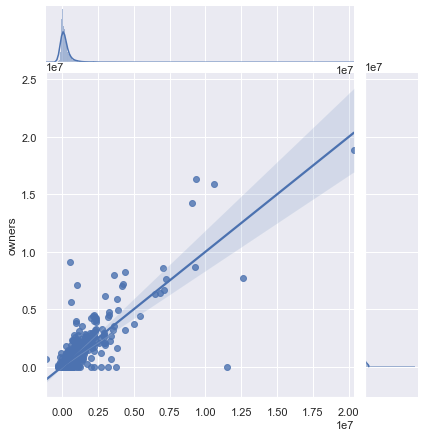

In [117]:
sns.jointplot(x=train_preds,y=y_train, kind='reg')

In [118]:
rmse = mean_squared_error(y_train, train_preds, squared=False)
print(rmse)
mae = mean_absolute_error(y_train, train_preds)
print(mae)

493401.66476032865
179740.1255320166


In [122]:
def diagnostic_plot(X, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(X,y)
    pred = rgr.predict(X)
    
    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

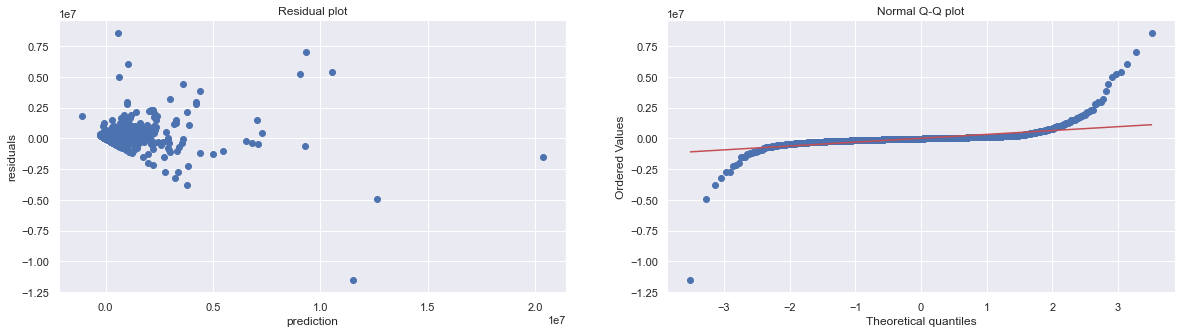

In [127]:
diagnostic_plot(X_train, y_train)

In [135]:
mergeddf.loc[[mergeddf.owners.argmax()]]

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
48,PLAYERUNKNOWN'S BATTLEGROUNDS,55509000,1711569,927347,784222,1.182506,382408,275,11437,669,...,0,0,0,0,0,0,0,0,1,0


In [137]:
mergeddf.sort_values('owners')

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
1163,Return to Castle Wolfenstein,0,5382,4981,401,12.421446,76,0,159,0,...,0,0,0,0,0,0,0,0,1,0
3811,Legacy of Kain: Soul Reaver 2,0,641,442,199,2.221106,5,0,150,0,...,0,0,0,0,1,0,0,0,0,0
3818,Space Ace,0,113,99,14,7.071429,0,0,23,0,...,0,0,0,0,0,0,0,0,1,0
3841,Lords of the Realm III,0,23,9,14,0.642857,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3848,Outlaws + A Handful of Missions,0,316,299,17,17.588235,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Valheim,15510000,231017,222551,8466,26.287621,64931,435,1113,820,...,0,0,0,0,0,0,0,0,1,0
16,Cyberpunk 2077,15933000,412306,314338,97968,3.208578,13992,67,2308,206,...,0,0,0,0,0,0,0,0,1,0
430,Borderlands 2,16338000,245356,229458,15898,14.433136,3789,977,1031,526,...,0,0,0,0,0,0,0,0,1,0
200,PAYDAY 2,18815000,503739,443776,59963,7.400831,51440,341,743,2164,...,0,0,0,0,0,0,0,0,1,0


In [140]:
nicedf = mergeddf[mergeddf.owners!=0]


In [185]:
X, y = nicedf.iloc[:,2:], nicedf.iloc[:,1]

In [186]:
X, y = nicedf.iloc[:,2:], nicedf.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [187]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7647879857613525

In [188]:
lr.score(X_val, y_val)

0.6382692947840836

In [189]:
train_preds = lr.predict(X_train)

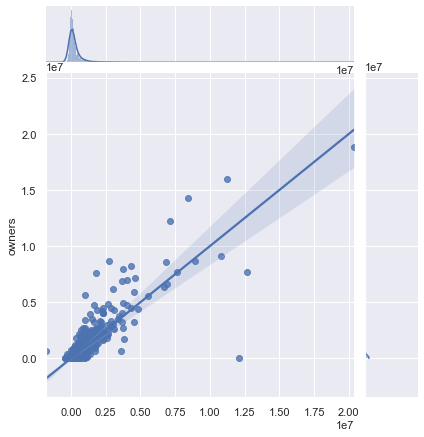

In [190]:
sns.jointplot(x=train_preds,y=y_train, kind='reg')

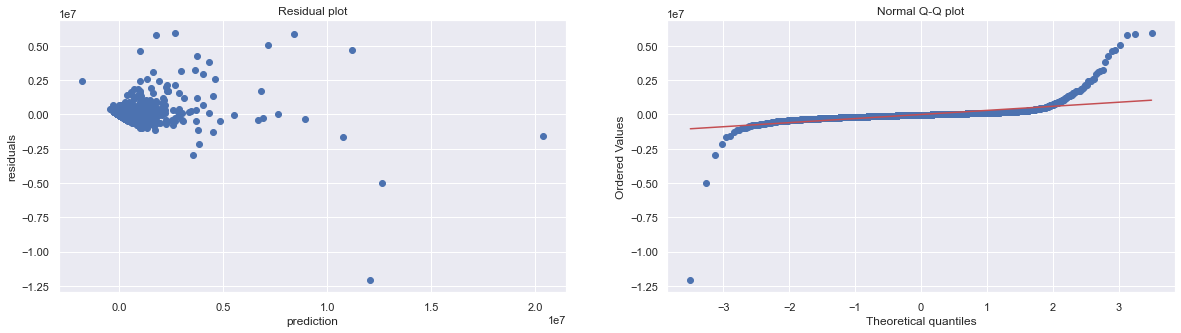

In [191]:
diagnostic_plot(X_train, y_train)

In [151]:
nicedf.sort_values('owners',ascending=False)

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
48,PLAYERUNKNOWN'S BATTLEGROUNDS,55509000,1711569,927347,784222,1.182506,382408,275,11437,669,...,0,0,0,0,0,0,0,0,1,0
200,PAYDAY 2,18815000,503739,443776,59963,7.400831,51440,341,743,2164,...,0,0,0,0,0,0,0,0,1,0
430,Borderlands 2,16338000,245356,229458,15898,14.433136,3789,977,1031,526,...,0,0,0,0,0,0,0,0,1,0
16,Cyberpunk 2077,15933000,412306,314338,97968,3.208578,13992,67,2308,206,...,0,0,0,0,0,0,0,0,1,0
2,Valheim,15510000,231017,222551,8466,26.287621,64931,435,1113,820,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Qbio,1000,25,19,6,3.166667,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4909,Bookshelf,1000,9,6,3,2.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2881,City Maker,1000,7,6,1,6.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2882,Dodgeball Simulator VR,1000,28,22,6,3.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [153]:
nicedf.drop(48,0,inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [154]:
nicedf.sort_values('owners',ascending=False)

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
200,PAYDAY 2,18815000,503739,443776,59963,7.400831,51440,341,743,2164,...,0,0,0,0,0,0,0,0,1,0
430,Borderlands 2,16338000,245356,229458,15898,14.433136,3789,977,1031,526,...,0,0,0,0,0,0,0,0,1,0
16,Cyberpunk 2077,15933000,412306,314338,97968,3.208578,13992,67,2308,206,...,0,0,0,0,0,0,0,0,1,0
2,Valheim,15510000,231017,222551,8466,26.287621,64931,435,1113,820,...,0,0,0,0,0,0,0,0,1,0
39,Wallpaper Engine,14268000,344555,337876,6679,50.587813,51336,11,594,138,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,Qbio,1000,25,19,6,3.166667,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4909,Bookshelf,1000,9,6,3,2.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2881,City Maker,1000,7,6,1,6.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2882,Dodgeball Simulator VR,1000,28,22,6,3.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [162]:
nicedf['pos_percent'] = (nicedf.positive/nicedf.num_reviews)*100

<ipython-input-162-176e6efb4b9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nicedf['pos_percent'] = (nicedf.positive/nicedf.num_reviews)*100


In [163]:
nicedf.head(1)

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild,pos_percent
0,OUTRIDERS,1811000,41862,26922,14940,1.802008,23037,279,1600,585,...,0,0,0,1,0,0,0,0,0,64.311309


In [164]:
nicedf.pos_percent.value_counts()

100.000000    154
50.000000      46
75.000000      38
66.666667      33
83.333333      30
             ... 
74.468085       1
81.025641       1
83.491686       1
85.487815       1
84.531143       1
Name: pos_percent, Length: 3779, dtype: int64

In [179]:
cols = list(nicedf.columns)

In [180]:
cols.insert(7, cols.pop(cols.index('neg_percent')))

In [181]:
nicedf = nicedf[cols]

In [182]:
nicedf.head(1)

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,0,1,0,0,0,0,0


In [183]:
nicedf.corr()

,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,median_forever,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
owners,1.000000,0.814190,0.814756,0.597676,0.098973,0.124101,-0.124101,0.577008,0.146572,0.049850,...,0.035341,0.093798,0.027885,-0.026860,0.039496,0.013235,0.026128,-0.016427,-0.091277,0.012093
num_reviews,0.814190,1.000000,0.995492,0.769131,0.109996,0.104827,-0.104827,0.758152,0.126183,0.053844,...,0.011307,0.058680,0.009373,-0.019855,0.012917,-0.000140,0.011744,-0.015316,-0.038317,-0.003949
positive,0.814756,0.995492,1.000000,0.705047,0.126816,0.117578,-0.117578,0.748366,0.122305,0.050919,...,0.010821,0.057286,0.009909,-0.019518,0.010406,-0.001011,0.011568,-0.015201,-0.035027,-0.004080
negative,0.597676,0.769131,0.705047,1.000000,-0.032075,-0.008475,0.008475,0.626027,0.119348,0.059481,...,0.011634,0.052744,0.003308,-0.016944,0.026461,0.005768,0.009858,-0.012090,-0.050473,-0.002037
ratio,0.098973,0.109996,0.126816,-0.032075,1.000000,0.493195,-0.493195,0.061512,0.022784,0.050137,...,-0.003618,-0.024909,0.000071,-0.029678,-0.017983,-0.017124,-0.010133,-0.013257,0.048587,-0.013359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THQ Nordic,0.013235,-0.000140,-0.001011,0.005768,-0.017124,-0.012738,0.012738,-0.005090,-0.002205,0.002769,...,-0.004968,-0.005865,-0.005957,-0.006395,-0.005957,1.000000,-0.003872,-0.005582,-0.248466,-0.005865
Ubisoft,0.026128,0.011744,0.011568,0.009858,-0.010133,0.007871,-0.007871,-0.004507,-0.004656,0.007542,...,-0.003641,-0.004299,-0.004366,-0.004687,-0.004366,-0.003872,1.000000,-0.004091,-0.182102,-0.004299
Winged Cloud,-0.016427,-0.015316,-0.015201,-0.012090,-0.013257,0.017751,-0.017751,-0.010741,-0.008543,-0.009698,...,-0.005248,-0.006196,-0.006293,-0.006756,-0.006293,-0.005582,-0.004091,1.000000,-0.262490,-0.006196
other,-0.091277,-0.038317,-0.035027,-0.050473,0.048587,0.007927,-0.007927,-0.057556,-0.049963,-0.081931,...,-0.233621,-0.275817,-0.280122,-0.300748,-0.280122,-0.248466,-0.182102,-0.262490,1.000000,-0.275817


<AxesSubplot:>

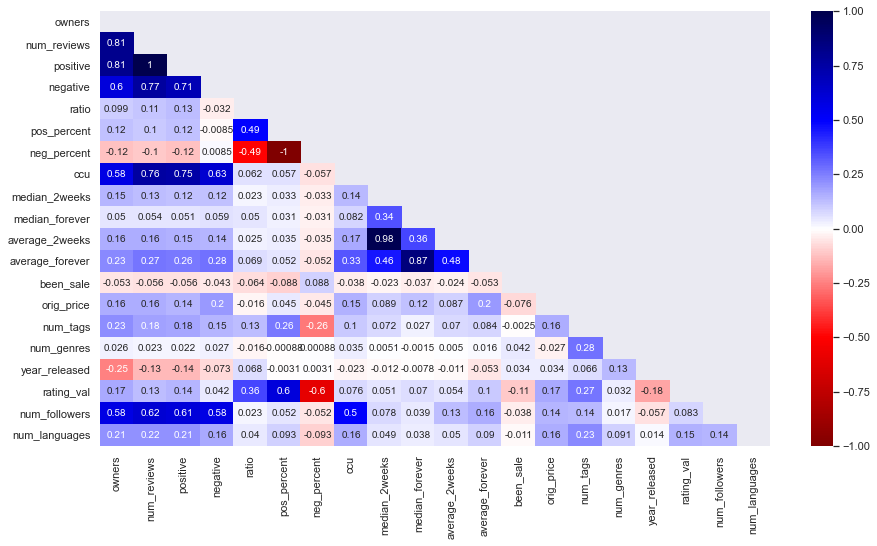

In [184]:
heatmapdf = nicedf.iloc[:,1:21]
plt.figure(figsize(15,8))
upper = np.triu(heatmapdf.corr())
sns.heatmap(heatmapdf.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper)



In [177]:
nicedf['neg_percent'] = (nicedf.negative/nicedf.num_reviews)*100

In [178]:
nicedf.columns

Index(['title', 'owners', 'num_reviews', 'positive', 'negative', 'ratio',
       'pos_percent', 'ccu', 'median_2weeks', 'median_forever',
       'average_2weeks', 'average_forever', 'been_sale', 'orig_price',
       'num_tags', 'num_genres', 'year_released', 'rating_val',
       'num_followers', 'num_languages', 'has_meta', 'userscore',
       'Singleplayer_tag', 'Indie_tag', 'Action_tag', 'Adventure_tag',
       'Casual_tag', 'Strategy_tag', 'Multiplayer_tag', 'RPG_tag',
       'Simulation_tag', 'Atmospheric_tag', 'Horror_tag', '2D_tag',
       'Soundtrack_tag', 'Great_tag', 'Story_tag', 'Rich_tag', 'World_tag',
       'Shooter_tag', 'Puzzle_tag', 'TurnBased_tag', 'Open_tag',
       'FirstPerson_tag', 'Survival_tag', 'Fantasy_tag', 'Funny_tag',
       'Coop_tag', 'Platformer_tag', 'Early_tag', 'Access_tag', 'Sim_tag',
       'Indie_genre', 'Action_genre', 'Adventure_genre', 'Casual_genre',
       'Simulation_genre', 'Strategy_genre', 'RPG_genre', '_genre',
       'Early_genre', 'Acces

In [192]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [215]:
add_deviation_feature(nicedf, 'positive','num_reviews')

In [206]:
nicedf.head()

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild,num_reviews_Dev_positive
0,OUTRIDERS,1811000,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,1,0,0,0,0,0,NaN
1,It Takes Two,776000,21082,20205,877,23.038769,95.840053,4.159947,11513,425,...,0,0,0,0,0,0,0,0,0,NaN
2,Valheim,15510000,231017,222551,8466,26.287621,96.335335,3.664665,64931,435,...,0,0,0,0,0,0,0,1,0,NaN
3,7 Days to Die,7988000,166766,144558,22208,6.509276,86.683137,13.316863,31593,186,...,0,0,0,0,0,0,0,1,0,NaN
4,Battlefield V,1037000,29548,19642,9906,1.982839,66.474888,33.525112,13485,479,...,0,0,0,0,0,0,0,0,0,NaN


In [219]:
try2 = nicedf[nicedf.positive_Dev_num_reviews.notna()]

In [214]:
nicedf.drop(columns=['num_reviews_Dev_positive'],inplace=True)

In [220]:
X, y = try2.iloc[:,2:], try2.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [221]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7064736556256218

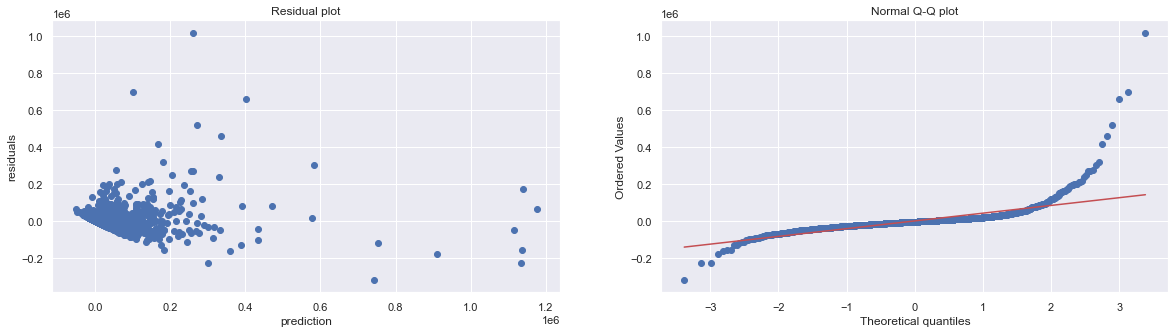

In [222]:
diagnostic_plot(X_train, y_train)

In [223]:
train_preds = lr.predict(X_train)

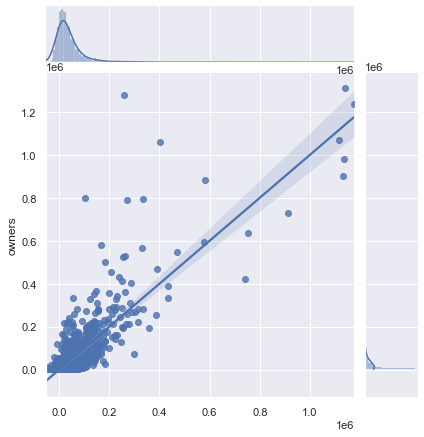

In [224]:
sns.jointplot(x=train_preds,y=y_train, kind='reg')

In [225]:
rmse = mean_squared_error(y_train, train_preds, squared=False)
print(rmse)
mae = mean_absolute_error(y_train, train_preds)
print(mae)

55375.850935356684
26585.19150874412


In [227]:
mergeddf.head(1)

,title,owners,num_reviews,positive,negative,ratio,ccu,median_2weeks,median_forever,average_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000,41862,26922,14940,1.802008,23037,279,1600,585,...,0,0,0,0,1,0,0,0,0,0


In [228]:
nicedf.head(1)

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild,positive_Dev_num_reviews
0,OUTRIDERS,1811000,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,1,0,0,0,0,0,NaN


# Modeling nicedf

attempting to asses final assimilated dataframe, nicedf, which has all features and no nulls

In [337]:
nicedf.sort_values('owners',ascending=False).head(5)

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
200,PAYDAY 2,18815000,503739,443776,59963,7.400831,88.096415,11.903585,51440,341,...,0,0,0,0,0,0,0,0,1,0
430,Borderlands 2,16338000,245356,229458,15898,14.433136,93.520436,6.479564,3789,977,...,0,0,0,0,0,0,0,0,1,0
16,Cyberpunk 2077,15933000,412306,314338,97968,3.208578,76.239007,23.760993,13992,67,...,0,0,0,0,0,0,0,0,1,0
2,Valheim,15510000,231017,222551,8466,26.287621,96.335335,3.664665,64931,435,...,0,0,0,0,0,0,0,0,1,0
39,Wallpaper Engine,14268000,344555,337876,6679,50.587813,98.061558,1.938442,51336,11,...,0,0,0,0,0,0,0,0,1,0


In [259]:
X, y = nicedf.iloc[:,2:22], nicedf.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [260]:
lr.fit(X_train,y_train)
lr.score(X_train, y_train)

0.7461128347001448

In [261]:
lr.score(X_val, y_val)

0.6557453046897627

In [252]:
nicedf.head(1)

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,0,1,0,0,0,0,0


In [352]:
nicedf.shape

(4947, 98)

In [274]:
train_preds, val_preds = lr.predict(X_train) , lr.predict(X_val)

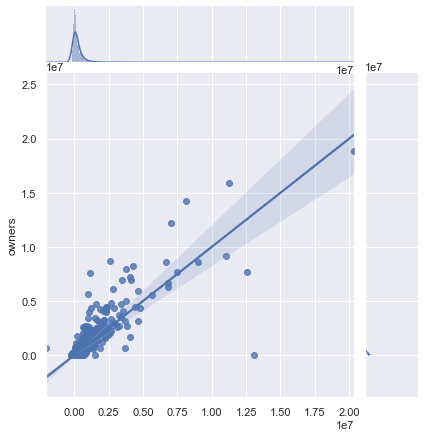

In [284]:
# # plt.figure(figsize(20,5))
# # plt.subplot(1, 2, 1)
# # sns.jointplot(x=train_preds,y=y_train, kind='reg')

# # plt.subplot(1, 2, 2)
# sns.jointplot(x = val_preds, y = y_val, kind='reg')



sns.jointplot(x=train_preds,y=y_train, kind='reg')

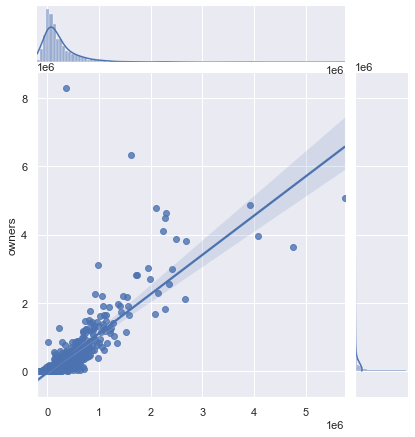

In [285]:
sns.jointplot(x = val_preds, y = y_val, kind='reg')

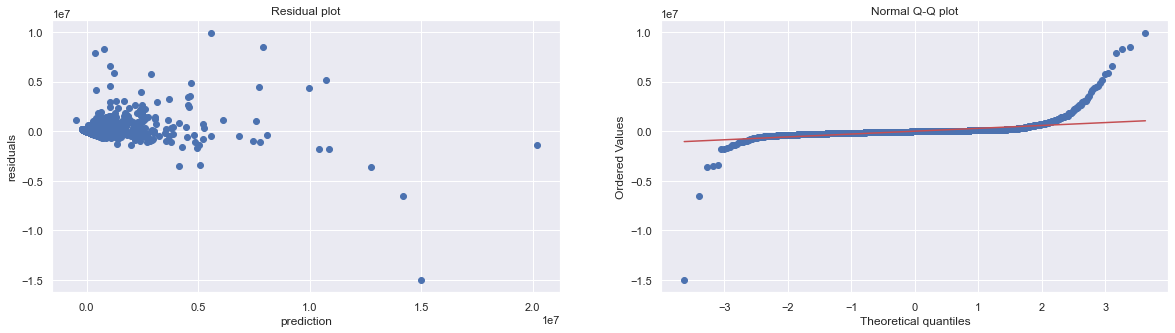

In [265]:
diagnostic_plot(X,y)

In [288]:
rmse = mean_squared_error(y_train, train_preds, squared=False)
print(rmse)
mae = mean_absolute_error(y_train, train_preds)
print(mae)

485068.63150050846
168142.10695905023


In [354]:
heatmapdf = nicedf.iloc[:,1:21]


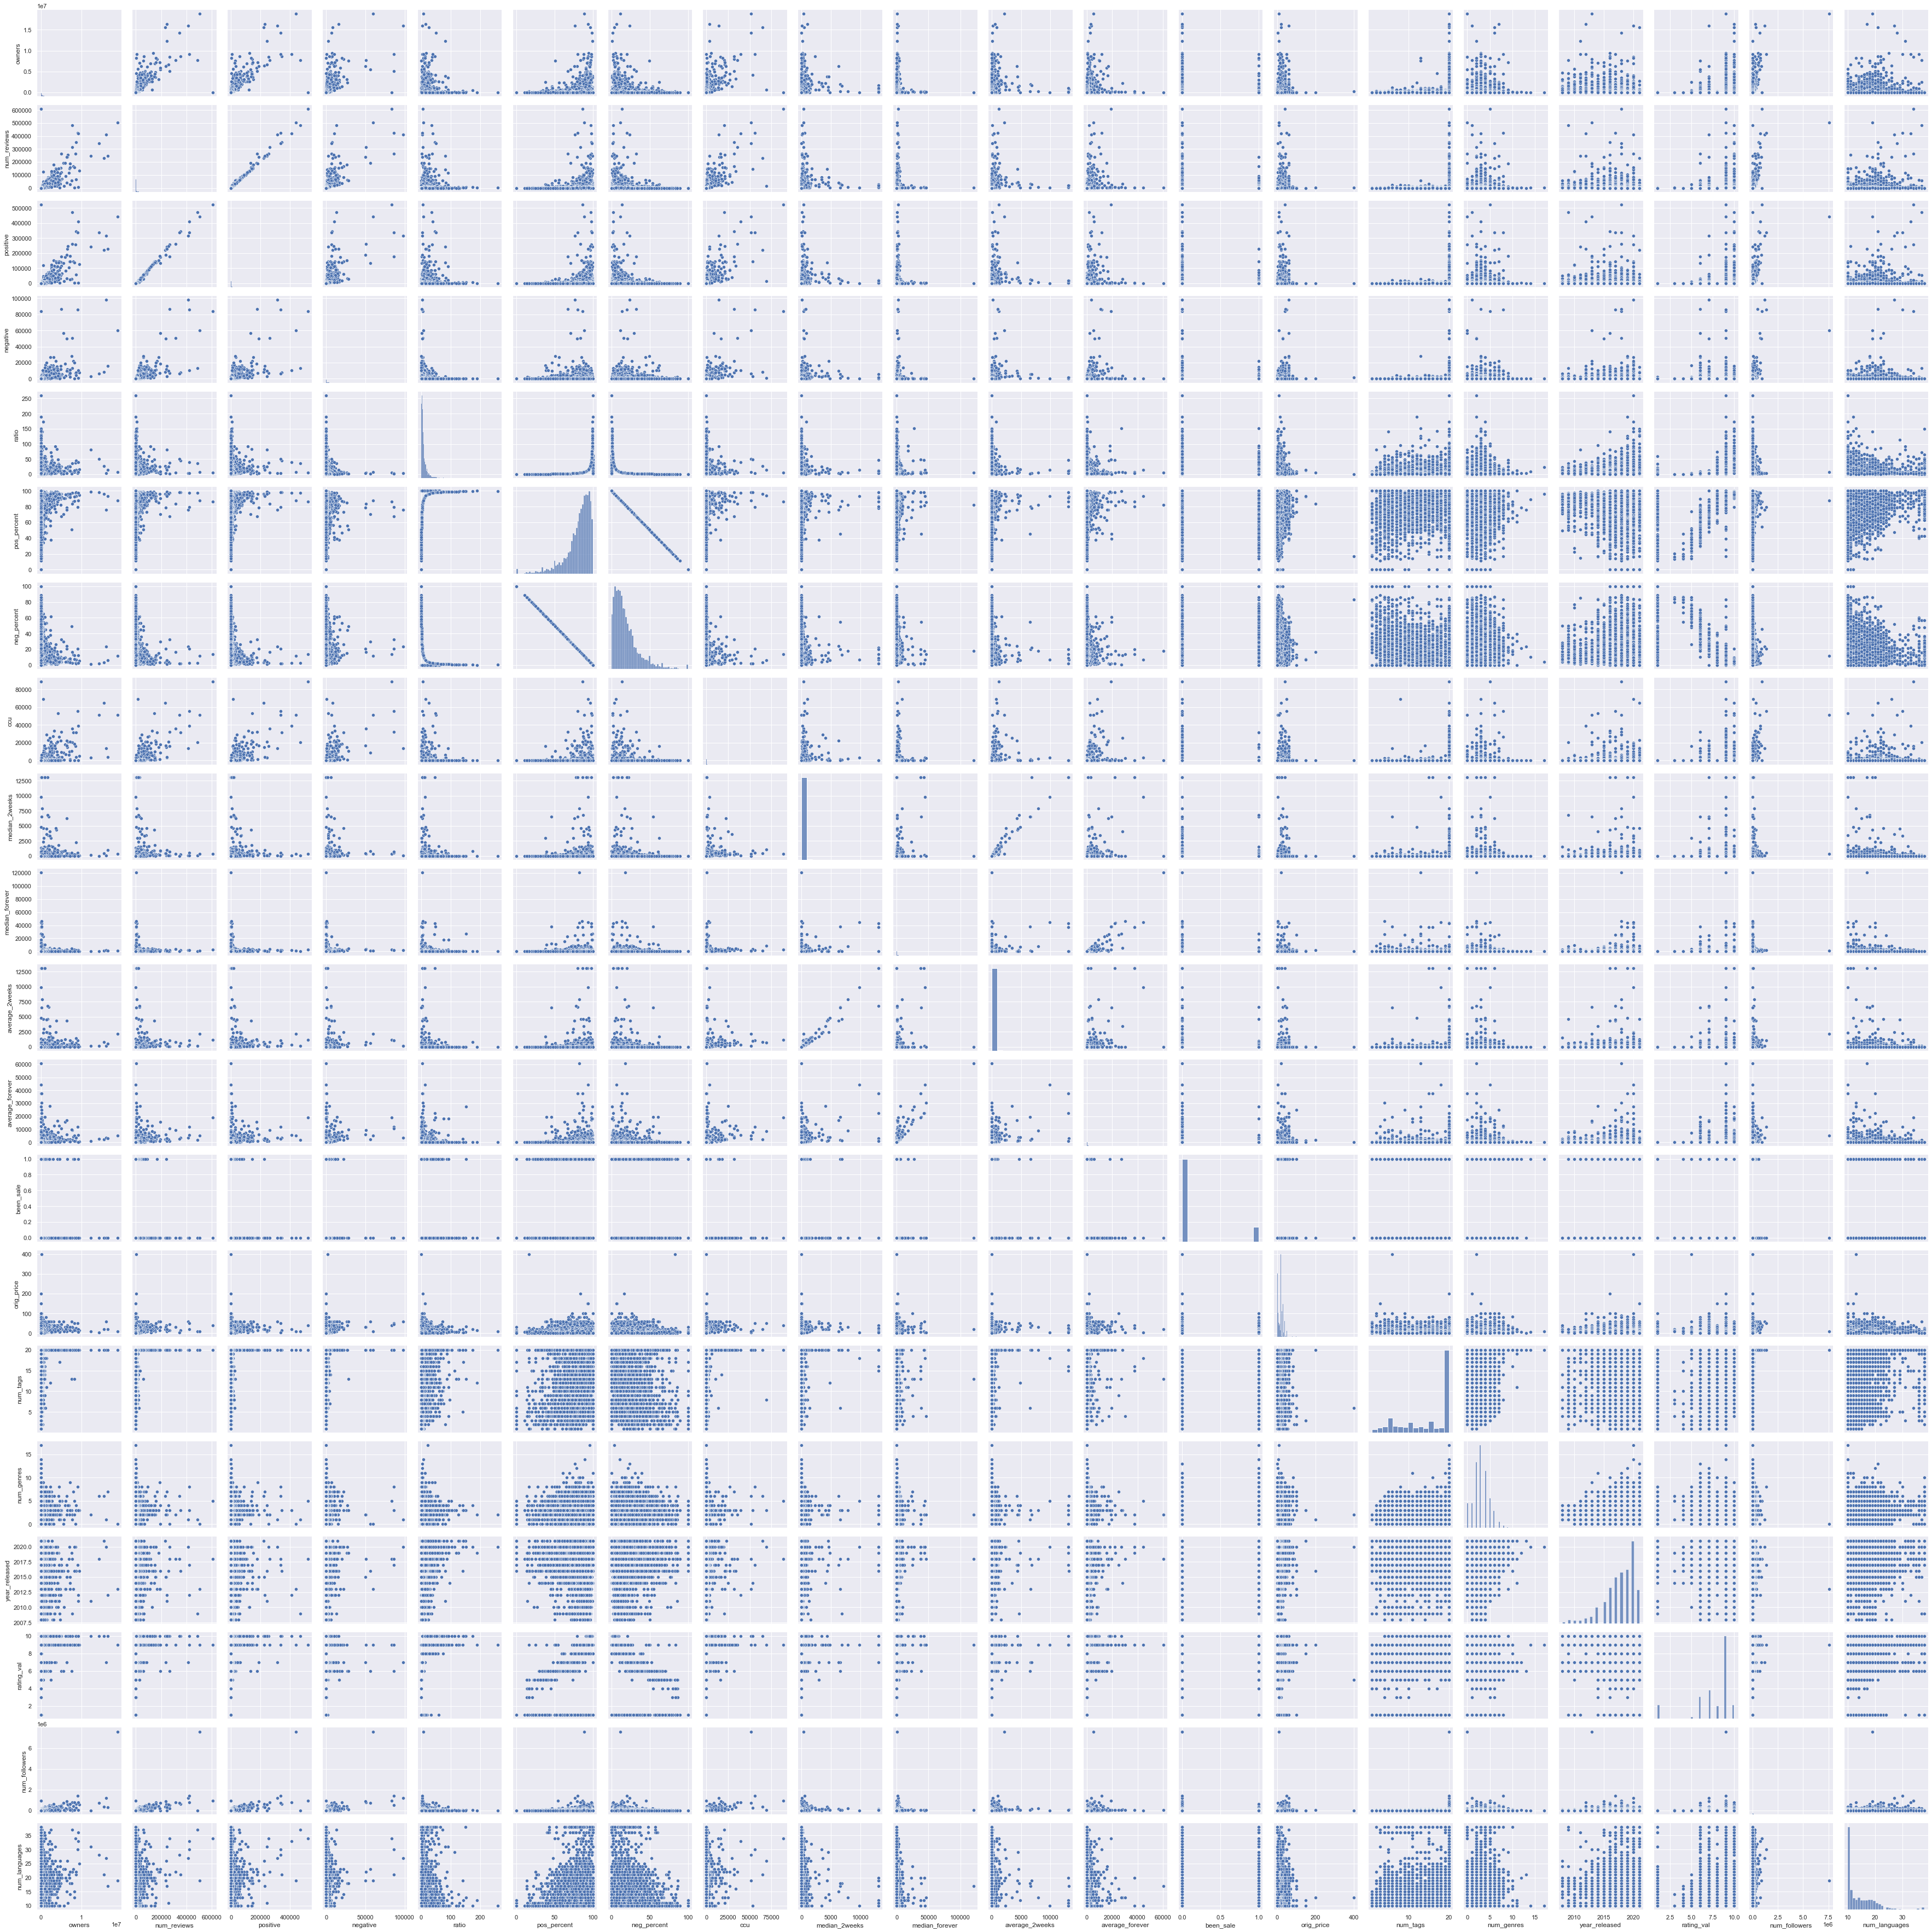

In [355]:
sns.pairplot(heatmapdf)

In [272]:
heatmapdf

,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,median_forever,average_2weeks,average_forever,been_sale,orig_price,num_tags,num_genres,year_released,rating_val,num_followers,num_languages
0,1811000,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,1600,585,2074,0,59.99,20.0,3.0,2021,6,121322.0,22
1,776000,21082,20205,877,23.038769,95.840053,4.159947,11513,425,753,371,670,0,39.99,20.0,3.0,2021,10,99446.0,21
2,15510000,231017,222551,8466,26.287621,96.335335,3.664665,64931,435,1113,820,2205,0,19.99,20.0,6.0,2021,10,333665.0,21
3,7988000,166766,144558,22208,6.509276,86.683137,13.316863,31593,186,766,374,4120,1,24.99,20.0,7.0,2013,9,403936.0,23
4,1037000,29548,19642,9906,1.982839,66.474888,33.525112,13485,479,799,542,1387,1,49.99,20.0,2.0,2020,6,67662.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,49000,114,84,30,2.800000,73.684211,26.315789,5,0,0,0,0,0,0.99,19.0,5.0,2015,5,262.0,10
5179,9000,35,11,24,0.458333,31.428571,68.571429,0,0,0,0,0,1,4.99,3.0,3.0,2016,5,185.0,16
5180,5000,50,7,43,0.162791,14.000000,86.000000,0,0,0,0,0,1,4.99,2.0,2.0,2016,5,141.0,16
5181,126000,92,44,48,0.916667,47.826087,52.173913,1,0,206,0,214,0,0.99,11.0,4.0,2015,6,661.0,10


In [293]:
nicedf[nicedf.neg_percent== 0]

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
254,Sakura Forest Girls,2000,7,7,0,7.0,100.0,0.0,8,0,...,0,0,0,0,0,0,0,1,0,0
389,Sakura Succubus 4,4000,44,44,0,44.0,100.0,0.0,4,0,...,0,0,0,0,0,0,0,1,0,0
1094,Eidolon,59000,13,13,0,13.0,100.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1210,Ginga Force,1000,34,34,0,34.0,100.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1227,Natsuki Chronicles,2000,26,26,0,26.0,100.0,0.0,2,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,Bulldozer,7000,7,7,0,7.0,100.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5095,The Long Sky,1000,3,3,0,3.0,100.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5106,T. B. P.,12000,2,2,0,2.0,100.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5127,REALITY,18000,9,9,0,9.0,100.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [302]:
nicedf.owners.value_counts() == 1

1000       False
2000       False
3000       False
4000       False
5000       False
           ...  
552000      True
1057000     True
1147000     True
765000      True
1799000     True
Name: owners, Length: 973, dtype: bool

In [312]:
nicedf2 = nicedf[nicedf['owners'].map(nicedf['owners'].value_counts()) > 1]

In [314]:
nicedf2.drop_duplicates(subset='title',inplace=True)

<ipython-input-314-a5d7c081dbf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nicedf2.drop_duplicates(subset='title',inplace=True)


In [316]:
nicedf2.owners.value_counts()

1000       380
2000       265
3000       210
4000       140
5000       129
          ... 
781000       2
527000       2
314000       2
1173000      2
598000       2
Name: owners, Length: 440, dtype: int64

<AxesSubplot:>

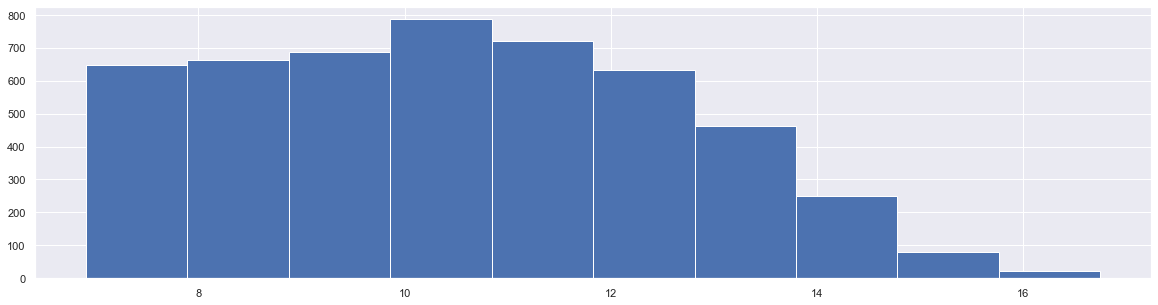

In [328]:
np.log(nicedf.owners).hist()

In [329]:
lr.fit(X_train, np.log(y_train))

LinearRegression()

In [330]:
lr.score(X_train, np.log(y_train))

0.589440356775585

In [332]:
lr.score(X_val,np.log(y_val))

0.5797651375741375

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


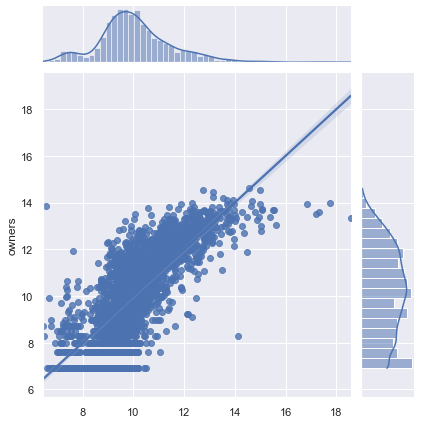

In [334]:
train_preds = lr.predict(X_train)
sns.jointplot(train_preds, np.log(y_train), kind='reg')

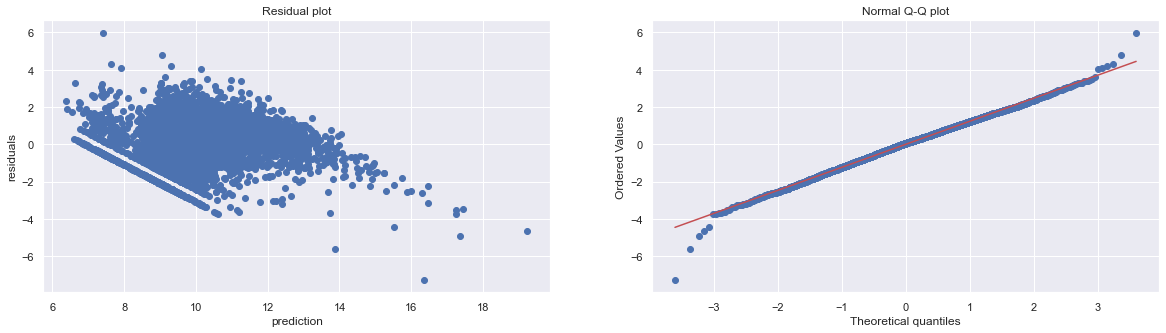

In [335]:
diagnostic_plot(X, np.log(y))

In [336]:
rmse = mean_squared_error(y_train, train_preds, squared=False)
print(rmse)
mae = mean_absolute_error(y_train, train_preds)
print(mae)

220934.54650173505
102618.28766394054


In [338]:
nicedf.owners = np.log(nicedf.owners)

In [341]:
nicedf.owners

0       14.409390
1       13.561908
2       16.556996
3       15.893451
4       13.851842
          ...    
5178    10.799576
5179     9.104980
5180     8.517193
5181    11.744037
5182     8.294050
Name: owners, Length: 4947, dtype: float64

In [342]:
nicedf.owners = exp(nicedf.owners)

In [344]:
nicedf.to_csv(r'/Users/MichaelHarnett/Desktop/Metis)

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000.0,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,0,1,0,0,0,0,0
1,It Takes Two,776000.0,21082,20205,877,23.038769,95.840053,4.159947,11513,425,...,1,0,0,0,0,0,0,0,0,0
2,Valheim,15510000.0,231017,222551,8466,26.287621,96.335335,3.664665,64931,435,...,0,0,0,0,0,0,0,0,1,0


# nicedf2
removed rows with owner value counts of 1, hoping to improve model


In [318]:
X, y = nicedf2.iloc[:,2:22], nicedf2.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [319]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5868079234297825

In [320]:
lr.score(X_val, y_val)

0.48416016123399874

In [356]:
nicedf.head()

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000.0,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,0,1,0,0,0,0,0
1,It Takes Two,776000.0,21082,20205,877,23.038769,95.840053,4.159947,11513,425,...,1,0,0,0,0,0,0,0,0,0
2,Valheim,15510000.0,231017,222551,8466,26.287621,96.335335,3.664665,64931,435,...,0,0,0,0,0,0,0,0,1,0
3,7 Days to Die,7988000.0,166766,144558,22208,6.509276,86.683137,13.316863,31593,186,...,0,0,0,0,0,0,0,0,1,0
4,Battlefield V,1037000.0,29548,19642,9906,1.982839,66.474888,33.525112,13485,479,...,1,0,0,0,0,0,0,0,0,0


In [358]:
nicedf.head()

,title,owners,num_reviews,positive,negative,ratio,pos_percent,neg_percent,ccu,median_2weeks,...,Electronic Arts,Paradox Interactive,SEGA,Sokpop Collective,Square Enix,THQ Nordic,Ubisoft,Winged Cloud,other,tinyBuild
0,OUTRIDERS,1811000.0,41862,26922,14940,1.802008,64.311309,35.688691,23037,279,...,0,0,0,0,1,0,0,0,0,0
1,It Takes Two,776000.0,21082,20205,877,23.038769,95.840053,4.159947,11513,425,...,1,0,0,0,0,0,0,0,0,0
2,Valheim,15510000.0,231017,222551,8466,26.287621,96.335335,3.664665,64931,435,...,0,0,0,0,0,0,0,0,1,0
3,7 Days to Die,7988000.0,166766,144558,22208,6.509276,86.683137,13.316863,31593,186,...,0,0,0,0,0,0,0,0,1,0
4,Battlefield V,1037000.0,29548,19642,9906,1.982839,66.474888,33.525112,13485,479,...,1,0,0,0,0,0,0,0,0,0


In [360]:
nicedf.shape

(4947, 98)

In [362]:
nicedf.to_csv(r'/Users/MichaelHarnett/Desktop/METIS/Steam_Analysis/Data\nicedf.csv', index = False)